# Import Libraries

In [1]:
# Basic data science stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# tensorflow and keras
import tensorflow as tf
from tensorflow.keras import models, layers

# image manipulation, system utilities
from PIL import Image
import os
import sys
import stat
import cv2
import progressbar
import pickle

# Image Loading Function

In [2]:
def load_image_data(folder, image_height = 150, image_width = 150):
    """Loop through all images within subfolders in the directory, resizing them and
    appending them to the image data list, while also appending their class label to the class list"""
    
    image_data = []
    class_names = []
    dim = (image_height, image_width)
    
    for directory in os.listdir(folder):
        
        # Line needed to address progressbar bug within Jupyter Notebook
        sys.stdout.flush()
        
        directory_path = os.path.join(folder, directory)
        
        #Create progress bar
        total_files = len(os.listdir(directory_path))
        tracker = progressbar.ProgressBar(max_value=total_files)
        
        for idx, file in enumerate(os.listdir(directory_path)):
            image_path = os.path.join(directory_path, file)
            
            # Load image, resize, convert to float, scale between 0 and 1
            im = cv2.imread(image_path)
            im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
            im = im.astype('float32')
            im /= 255
            
            # Append image to image list and class to class list
            image_data.append(im)
            class_names.append(directory)
            
            # Advance progress bar
            tracker.update(idx)
        
        # Finish progressbar and print message
        tracker.finish()
        print('----{} directory complete!----'.format(directory))
            
    return image_data, class_names         

# Call Function

In [3]:
train_images, train_classes = load_image_data('C:\\Users\\atyou\\Outdoor-Image-Classification\\Data\\seg_train', 150, 150)
test_images, test_classes = load_image_data('C:\\Users\\atyou\\Outdoor-Image-Classification\\Data\\seg_test', 150, 150)

100% (2191 of 2191) |####################| Elapsed Time: 0:00:09 Time:  0:00:09


----buildings directory complete!----


100% (2271 of 2271) |####################| Elapsed Time: 0:00:10 Time:  0:00:10


----forest directory complete!----


100% (2404 of 2404) |####################| Elapsed Time: 0:00:16 Time:  0:00:16


----glacier directory complete!----


100% (2512 of 2512) |####################| Elapsed Time: 0:00:16 Time:  0:00:16


----mountain directory complete!----


100% (2274 of 2274) |####################| Elapsed Time: 0:00:10 Time:  0:00:10


----sea directory complete!----


100% (2382 of 2382) |####################| Elapsed Time: 0:00:10 Time:  0:00:10


----street directory complete!----


100% (437 of 437) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


----buildings directory complete!----


100% (474 of 474) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


----forest directory complete!----


100% (553 of 553) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


----glacier directory complete!----


100% (525 of 525) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


----mountain directory complete!----


100% (510 of 510) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


----sea directory complete!----


100% (501 of 501) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


----street directory complete!----


# Create Train/Test Arrays

In [4]:
# create dict to map classes to ints
class_dict = {k: v for v, k in enumerate(np.unique(train_classes))}

X_train = np.array(train_images)
y_train = np.array([class_dict[x] for x in train_classes])

X_test = np.array(test_images)
y_test = np.array([class_dict[x] for x in test_classes])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14034, 150, 150, 3) (14034,) (3000, 150, 150, 3) (3000,)


# Quick look at the data

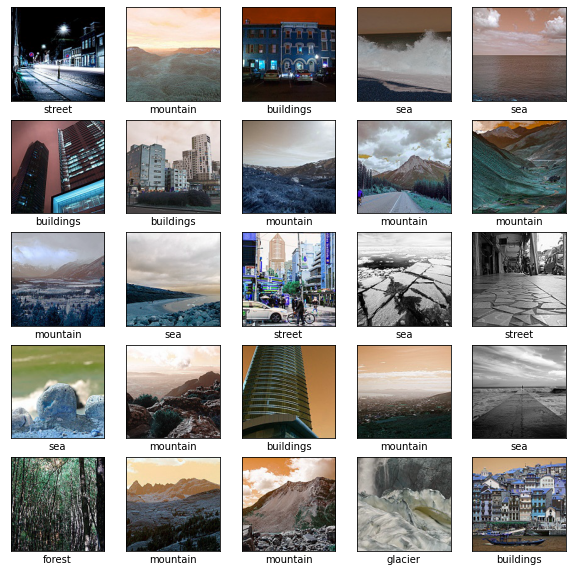

In [5]:
plt.figure(figsize=(10,10))

for i in range(25):
    j = np.random.choice([x for x in range(len(X_train))])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j])
    plt.xlabel(train_classes[j])
plt.show()


# Save data in model-ready format

In [6]:
with open('../Data/Cleaned/X_train.pickle', 'wb') as file:
    pickle.dump(X_train, file)
    
with open('../Data/Cleaned/X_test.pickle', 'wb') as file:
    pickle.dump(X_test, file)

with open('../Data/Cleaned/y_train.pickle', 'wb') as file:
    pickle.dump(y_train, file)

with open('../Data/Cleaned/y_test.pickle', 'wb') as file:
    pickle.dump(y_test, file)